In [83]:
naslib_path = '../../zero_cost/NASLib'
benchmark = 'zc_transbench101_macro'

In [84]:
from zc_combine.utils.naslib_utils import load_search_space, parse_scores


search_space = load_search_space(naslib_path, benchmark)
dfs = parse_scores(search_space)

In [85]:
dataset = 'class_object'
proxy = 'nwot'
data = dfs[dataset]

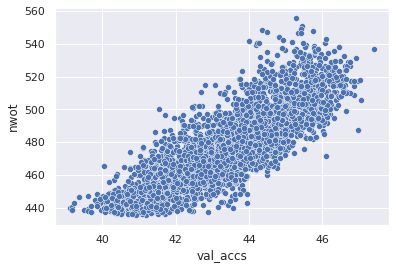

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.scatterplot(data=data, x='val_accs', y=proxy)
#plt.xlim(70, 91)
#plt_ylim(proxy)
plt.show()

In [87]:
from zc_combine.operations import parse_ops_nb201, count_all_ops

count_set = {1, 2, 3, 4}
ops = parse_ops_nb201(data)
count_all_ops(data, ops, count_set)

In [88]:
#layer_type = int(layer_type)  # channel change: [2, 4]; stride change: [3, 4]

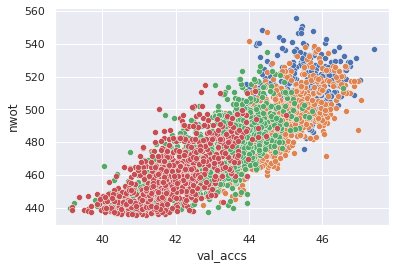

In [89]:
from zc_combine.operations import plot_clouds

plot_clouds(data, (3,4), proxy, vmax=5)
#plt_ylim(proxy)
plt.show()

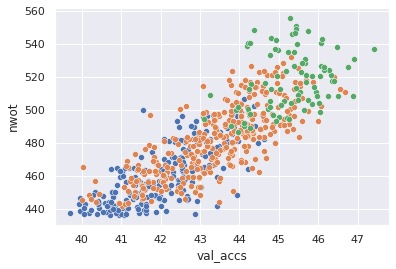

In [90]:
zoom = 4

data_zoom = data[data[str((2,3))] == zoom]
plot_clouds(data_zoom, data_zoom[str((2,))], proxy, vmax=5)
#plt.xlim(69, 93)
#plt.ylim(700, 820)
plt.show()

In [91]:
data_zoom

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,...,"(1, 3)","(1, 4)","(2, 3)","(2, 4)","(3, 4)","(1, 2, 3)","(1, 2, 4)","(1, 3, 4)","(2, 3, 4)","(1, 2, 3, 4)"
3,"(4, 3, 3, 1, 3, 2)",41.973526,1.886227,906.493184,34.928699,8.012875,-32.011908,490.587555,448.190014,5.083780,...,4,2,4,2,4,5,3,5,5,6
4,"(2, 1, 1, 3, 2, 3)",46.675957,0.796325,10486.711552,12.797833,0.798150,-32.018582,507.892181,510.916413,6.887044,...,4,2,4,2,2,6,4,4,4,6
7,"(1, 3, 2, 2, 3, 1)",43.391720,1.216642,4771.579136,16.933189,0.881211,-32.008608,492.207001,485.683317,7.759364,...,4,2,4,2,2,6,4,4,4,6
9,"(3, 1, 1, 2, 2, 3)",44.227707,0.535043,3863.250176,10.906914,0.399003,-32.016367,446.683075,478.199998,5.545988,...,4,2,4,2,2,6,4,4,4,6
18,"(3, 3, 1, 3, 2, 4)",41.127586,1.108668,402.156800,28.355051,10.714993,-32.014754,401.838684,440.384146,3.275012,...,4,2,4,2,4,5,3,5,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,"(2, 4, 2, 3, 3, 1)",44.984077,2.584373,16705.776128,35.821579,12.808941,-32.011415,775.947021,501.879400,39.939972,...,3,2,4,3,3,5,4,4,5,6
3237,"(4, 3, 2, 3, 2, 1)",41.247013,2.252596,2621.336064,34.768177,12.378601,-32.014880,649.055969,458.916487,23.565956,...,3,2,4,3,3,5,4,4,5,6
3239,"(3, 2, 3, 1, 2, 1)",44.312302,0.732778,2236.450048,12.416497,-0.220752,-32.012314,478.001343,464.868237,6.382340,...,4,2,4,2,2,6,4,4,4,6
3240,"(3, 2, 1, 3, 3, 1)",43.585789,1.006498,1624.799872,22.703968,4.192446,-32.014897,431.469635,465.055077,3.106820,...,5,2,4,1,3,6,3,5,4,6


In [92]:
from zc_combine.operations import filter_by_range

filt_1 = filter_by_range(data_zoom, proxy, 430, 460)

In [93]:
filt_1.sort_values('nwot')

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,...,"(1, 3)","(1, 4)","(2, 3)","(2, 4)","(3, 4)","(1, 2, 3)","(1, 2, 4)","(1, 3, 4)","(2, 3, 4)","(1, 2, 3, 4)"
430,"(3, 3, 3, 2)",40.704617,0.269081,330.586752,9.660830,0.812966,-32.016637,256.609375,436.269166,1.014532,...,3,0,4,1,3,4,1,3,4,4
769,"(3, 3, 3, 4, 2)",41.077827,1.063706,338.959616,24.938530,6.196976,-32.018892,356.459839,436.337913,3.127044,...,3,1,4,2,4,4,2,4,5,5
393,"(3, 3, 3, 1, 4, 2)",40.938496,1.094289,348.445952,27.751169,6.587120,-32.017252,402.017242,436.806759,3.275012,...,4,2,4,2,4,5,3,5,5,6
2930,"(3, 3, 4, 3, 1, 2)",40.391125,1.445381,373.644544,28.662071,7.641682,-32.020221,443.286469,436.847860,4.173188,...,4,2,4,2,4,5,3,5,5,6
311,"(3, 3, 3, 1, 1, 2)",42.884155,0.291763,349.559424,12.588783,1.300635,-32.015182,346.678345,437.095904,1.310468,...,5,2,4,1,3,6,3,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,"(3, 1, 2, 3, 4, 3)",40.968353,1.960873,1267.584256,41.852894,7.413002,-32.014681,481.553894,459.680118,6.005508,...,4,2,4,2,4,5,3,5,5,6
2829,"(3, 1, 2, 3, 3, 1)",43.426552,0.861963,1171.028608,18.858889,2.735462,-32.015201,412.937744,459.749015,2.663940,...,5,2,4,1,3,6,3,5,4,6
2219,"(3, 2, 3, 1, 2)",42.963776,0.439788,1631.683840,9.270622,0.180551,-32.012825,387.368164,459.793819,4.020996,...,3,1,4,2,2,5,3,3,4,5
773,"(3, 1, 2, 3, 3, 4)",41.033043,2.502229,1166.806272,38.807327,11.582207,-32.015811,448.978668,459.985123,4.185604,...,4,2,4,2,4,5,3,5,5,6


In [94]:
data_zoom.sort_values('nwot')

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,...,"(1, 3)","(1, 4)","(2, 3)","(2, 4)","(3, 4)","(1, 2, 3)","(1, 2, 4)","(1, 3, 4)","(2, 3, 4)","(1, 2, 3, 4)"
430,"(3, 3, 3, 2)",40.704617,0.269081,330.586752,9.660830,0.812966,-32.016637,256.609375,436.269166,1.014532,...,3,0,4,1,3,4,1,3,4,4
769,"(3, 3, 3, 4, 2)",41.077827,1.063706,338.959616,24.938530,6.196976,-32.018892,356.459839,436.337913,3.127044,...,3,1,4,2,4,4,2,4,5,5
393,"(3, 3, 3, 1, 4, 2)",40.938496,1.094289,348.445952,27.751169,6.587120,-32.017252,402.017242,436.806759,3.275012,...,4,2,4,2,4,5,3,5,5,6
2930,"(3, 3, 4, 3, 1, 2)",40.391125,1.445381,373.644544,28.662071,7.641682,-32.020221,443.286469,436.847860,4.173188,...,4,2,4,2,4,5,3,5,5,6
311,"(3, 3, 3, 1, 1, 2)",42.884155,0.291763,349.559424,12.588783,1.300635,-32.015182,346.678345,437.095904,1.310468,...,5,2,4,1,3,6,3,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,"(1, 2, 2, 2, 1, 3)",45.740448,1.040367,94467.082752,10.603898,0.219241,-32.011991,661.296204,547.806103,30.383492,...,3,2,4,3,1,6,5,3,4,6
1360,"(2, 1, 2, 2, 1, 3)",44.367039,1.627152,96282.167808,18.404556,0.272912,-32.016368,679.731140,548.312798,30.826372,...,3,2,4,3,1,6,5,3,4,6
1318,"(2, 2, 2, 1, 3, 1)",45.426952,2.581890,103529.925120,21.847775,0.725655,-32.008774,744.064148,549.084818,39.676804,...,3,2,4,3,1,6,5,3,4,6
1049,"(2, 2, 1, 2, 1, 3)",45.441879,1.125726,103536.216576,14.036671,0.175461,-32.016541,706.668518,551.185266,32.596868,...,3,2,4,3,1,6,5,3,4,6


In [95]:
data.sort_values('val_accs')

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,...,"(1, 3)","(1, 4)","(2, 3)","(2, 4)","(3, 4)","(1, 2, 3)","(1, 2, 4)","(1, 3, 4)","(2, 3, 4)","(1, 2, 3, 4)"
668,"(3, 3, 3, 1, 2, 2)",39.107285,0.747890,474.535168,20.367779,3.878586,-32.015144,401.520813,439.823322,3.275012,...,4,1,5,2,3,6,3,4,5,6
1423,"(3, 3, 4, 4, 1, 2)",39.157047,2.241680,526.612992,39.258804,15.992493,-32.012389,531.847717,438.406190,13.755524,...,3,3,3,3,4,4,4,5,5,6
1348,"(3, 4, 3, 1, 4, 2)",39.162022,1.906187,627.554816,36.420708,9.562798,-32.012480,528.839355,440.680601,12.440324,...,3,3,3,3,4,4,4,5,5,6
2391,"(3, 3, 3, 2, 2, 2)",39.221737,1.063448,1002.408448,25.869469,6.515705,-32.012900,497.732147,443.003336,11.546372,...,3,0,6,3,3,6,3,3,6,6
2605,"(3, 1, 3, 4, 4, 2)",39.371021,1.784017,640.596480,39.243732,-3.872345,-32.012552,486.575684,446.291403,11.542148,...,3,3,3,3,4,4,4,5,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,"(1, 4, 2, 4, 1)",46.969547,1.736832,7955.876352,19.386658,0.451702,-32.018070,501.343262,487.185729,20.679044,...,2,4,1,3,2,3,5,4,3,5
1351,"(2, 2, 3, 1, 1, 4)",46.989452,0.880052,20325.665280,14.701825,1.175609,-32.013208,621.906372,517.250016,18.239876,...,3,3,3,3,2,5,5,4,4,6
2319,"(2, 1, 1, 4, 1, 2)",47.039211,0.610891,20258.834944,9.681667,-0.108955,-32.009279,546.330078,517.790242,14.632836,...,3,4,2,3,1,5,6,4,3,6
996,"(2, 4, 1, 1, 1, 4)",47.054142,0.678556,13804.571136,12.821630,0.212175,-32.024939,599.384644,505.766544,18.173828,...,3,5,1,3,2,4,6,5,3,6


In [96]:
(data['net'] == str((2,2,2,1,3,1))).any()

True

In [97]:
data['net'].str.count('2').max()

3

In [98]:
data[data['net'].str.startswith('(2, 2, 2')]

,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,...,"(1, 3)","(1, 4)","(2, 3)","(2, 4)","(3, 4)","(1, 2, 3)","(1, 2, 4)","(1, 3, 4)","(2, 3, 4)","(1, 2, 3, 4)"
536,"(2, 2, 2, 3, 1)",47.422375,1.765105,64850.053632,16.595991,0.238665,-32.014020,615.915710,537.042253,30.235524,...,2,1,4,3,1,5,4,2,4,5
955,"(2, 2, 2, 3, 3)",45.810112,1.442958,57664.932352,17.445732,0.788762,-32.013495,648.100708,535.127453,30.498692,...,2,0,5,3,2,5,3,2,5,5
1196,"(2, 2, 2, 1, 3)",45.342358,1.205810,93859.957248,16.279570,-0.203787,-32.021732,616.237366,546.344646,30.235524,...,2,1,4,3,1,5,4,2,4,5
1318,"(2, 2, 2, 1, 3, 1)",45.426952,2.581890,103529.925120,21.847775,0.725655,-32.008774,744.064148,549.084818,39.676804,...,3,2,4,3,1,6,5,3,4,6
1365,"(2, 2, 2, 3, 1, 1)",46.073845,2.656201,74520.021504,18.191061,0.557486,-32.010062,744.066345,540.449489,39.676804,...,3,2,4,3,1,6,5,3,4,6
1421,"(2, 2, 2, 3, 3, 1)",45.844944,2.375884,60082.424320,27.059052,2.671360,-32.009224,776.222229,535.761093,39.939972,...,3,1,5,3,2,6,4,3,5,6
1639,"(2, 2, 2, 3)",44.765129,1.440295,55180.085760,12.723811,0.110718,-32.038322,487.956146,533.479227,20.794244,...,1,0,4,3,1,4,3,1,4,4
1727,"(2, 2, 2, 1, 3, 3)",44.491444,1.631188,96344.803840,25.455526,1.936396,-32.014377,775.828430,547.317975,39.939972,...,3,1,5,3,2,6,4,3,5,6
1837,"(2, 2, 2, 3, 3, 3)",44.501392,3.177360,58286.139904,43.312016,16.625458,-32.010474,808.112305,534.990152,40.203140,...,3,0,6,3,3,6,3,3,6,6
2757,"(2, 2, 2, 1, 1, 3)",45.287621,1.528067,132539.828736,15.068113,0.236765,-32.013521,744.173340,555.950026,39.676804,...,3,2,4,3,1,6,5,3,4,6


In [99]:
data.sort_values('nwot')


,net,val_accs,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,...,"(1, 3)","(1, 4)","(2, 3)","(2, 4)","(3, 4)","(1, 2, 3)","(1, 2, 4)","(1, 3, 4)","(2, 3, 4)","(1, 2, 3, 4)"
16,"(3, 3, 3, 4, 1)",41.177349,1.078350,314.795648,24.552492,4.283257,-32.024837,320.828064,435.306351,1.605380,...,4,2,3,1,4,4,2,5,4,5
2046,"(3, 3, 3, 3, 2)",40.923569,0.626186,307.773056,19.426323,2.265196,-32.016158,313.422394,435.520255,1.166724,...,4,0,5,1,4,5,1,4,5,5
2284,"(3, 3, 3, 3, 1, 2)",40.689690,1.224032,310.144640,27.709591,6.698769,-32.015022,358.927612,436.097712,1.314692,...,5,1,5,1,4,6,2,5,5,6
2897,"(3, 3, 3, 1, 4, 1)",40.804142,1.527787,324.281984,31.803827,10.741669,-32.019809,365.786469,436.143971,1.753348,...,5,3,3,1,4,5,3,6,4,6
862,"(3, 3, 3, 4)",41.694866,0.687048,305.333888,18.271967,2.071104,-32.033505,256.045105,436.231545,1.014532,...,3,1,3,1,4,3,1,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,"(1, 2, 2, 2, 1, 3)",45.740448,1.040367,94467.082752,10.603898,0.219241,-32.011991,661.296204,547.806103,30.383492,...,3,2,4,3,1,6,5,3,4,6
1360,"(2, 1, 2, 2, 1, 3)",44.367039,1.627152,96282.167808,18.404556,0.272912,-32.016368,679.731140,548.312798,30.826372,...,3,2,4,3,1,6,5,3,4,6
1318,"(2, 2, 2, 1, 3, 1)",45.426952,2.581890,103529.925120,21.847775,0.725655,-32.008774,744.064148,549.084818,39.676804,...,3,2,4,3,1,6,5,3,4,6
1049,"(2, 2, 1, 2, 1, 3)",45.441879,1.125726,103536.216576,14.036671,0.175461,-32.016541,706.668518,551.185266,32.596868,...,3,2,4,3,1,6,5,3,4,6
